In [1]:
import cv2
import matplotlib.pyplot as plt

I have used a big sample of the dataset for faces and eyes from this websit: 
    https://github.com/opencv/opencv/tree/master/data/haarcascades

In [2]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Capturing from two cameras at the same time.

In [3]:
cap0 = cv2.VideoCapture(0) # Read from the firs camera.
cap1 = cv2.VideoCapture(1) # Read from the second camera.

while True:
    ret0, img0 = cap0.read()
    ret1, img1 = cap1.read()
    
    gray0 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray0, 1.5, 5)
    eyes = eye_cascade.detectMultiScale(gray1, 1.5, 5)
    
    for (x,y,w,h) in faces:
        
        cv2.rectangle(img0, (x,y), (x+w, y+h), (255,0,0), 2)

    for (x,y,w,h) in eyes:
        
        cv2.rectangle(img1, (x,y), (x+w, y+h), (255,0,0), 2)
       
    cv2.imshow('img0', img0)
    cv2.imshow('img1', img1)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap0.release()
cap1.release()
cv2.destroyAllWindows()

# Record from both camera and detect the face and eyes at the same time.

(<matplotlib.axes._subplots.AxesSubplot at 0x2c35e75dba8>,
 Text(0.5,1,'Detecation of the Eyes'))

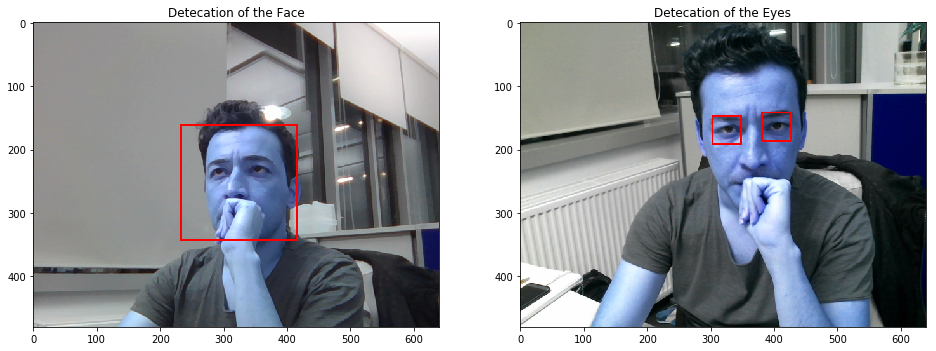

In [4]:
plt.figure(figsize=(16, 10))        
plt.subplot(1,2,1), plt.imshow(img0,'gray'), plt.title('Detecation of the Face')
plt.subplot(1,2,2), plt.imshow(img1,'gray'), plt.title('Detecation of the Eyes')